# AM2061 Algorithm 4-1
## Cubic Spline Interpolation - Condition 1

Cubic Spline Interpolation is an algoritm used to interpolate along a given interval with $n$ datapoints, using 3rd-degree polynomials $S_j \left( x \right)$ with $j=0,1,2,...,n-1$. We have $4$ coefficients $a_j, b_j, c_j, d_j$ for each polynomial segment $S_j \left( x \right)$, where:

$$ S_j \left( x \right) = a_j + b_j \left( x - x_j \right) + c_j \left( x - x_j \right)^2 + d_j \left( x - x_j \right)^3 $$

Here we can see that $S_j \left( x_j \right) = a_j$, and let us define $h_j \equiv x_{j+1} - x_j$. By using the conditions set in **Lecture 15** and following the procedure in **Lecture 16**, we arrive at the following expression:

$$ h_{j-1}c_{j-1} + 2\left( h_{j-1} + h_j \right) c_j +h_j c_{j+1} = \frac{3}{h_j} \left( a_{j+1} - a_j \right) - \frac{3}{h_{j-1}} \left( a_j - a_{j-1} \right) $$

Consider the free-boundary condition - **Condition 1**, $S''\left( x_0 \right) = S''\left( x_n \right) = 0 \Rightarrow c_0 = c_n = 0$. We solve a set of linear equations $Ax=b$ using **LU Decomposition** (Algorithm 3.4) to find $x$, the coefficients $c_j$:

\begin{gather}
\begin{bmatrix}
1 & 0 & 0 & \dots & \dots & \dots & 0 \\
h_0 & 2\left( h_0 + h_1 \right) & h_1 & \ddots &  &  & \vdots \\
0 & h_1 & 2\left( h_1 + h_2 \right) & h_2 & \ddots &  & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots &  & \ddots & \ddots & \ddots & \ddots & 0 \\
\vdots &  &  & \ddots & h_{n-2} & 2\left( h_{n-2} + h_{n-1} \right) & h_{n-1} \\
0 & \dots & \dots & \dots & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
c_0 \\
c_1 \\
c_2 \\
\vdots \\
\vdots \\
\vdots \\
c_n
\end{bmatrix}
=
\begin{bmatrix}
0 \\
\frac{3}{h_1} \left( a_2 - a_1 \right) - \frac{3}{h_0} \left( a_1 - a_0 \right) \\
\vdots \\
\vdots \\
\frac{3}{h_{n-1}} \left( a_n - a_{n-1} \right) - \frac{3}{h_{n-2}} \left( a_{n-1} - a_{n-2} \right) \\
0
\end{bmatrix}
\end{gather}

We will solve this as in Algorithm 3.4, with *Crout's Methods*, all $U_{i,i} = 1$. And the Matrices $L$ and $U$ look as follows:

\begin{gather}
L = 
\begin{bmatrix}
l_{1,1} & 0 & \dots & \dots & \dots & 0 \\
l_{2,1} & l_{2,2} & \ddots &  &  & \vdots \\
0 & \ddots & \ddots & \ddots &  & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots &  & \ddots & \ddots & \ddots & 0 \\
0 & \dots & \dots & 0 & l_{n,n-1} & l_{n,n-1}
\end{bmatrix}
\end{gather}

\begin{gather}
U = 
\begin{bmatrix}
1 & u_{1,2} & 0 & \dots & 0 \\
0 & 1 & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & 0 \\
\vdots &  & \ddots & \ddots & u_{n-1,n} \\
0 & \dots & \dots & 0 & 1
\end{bmatrix}
\end{gather}

This will allow us to solve:

$$ L z = b $$
$$ U x = z $$

Where $z$ is an intermediate matrix used to help solve for $x$ and thus all $c_j$. Upon doing so, we can find the *coefficients* $b_j$ and $d_j$ with the following:

$$ b_j = \frac{1}{h_j} \left( a_{j+1} - a_j \right) - \frac{h_j}{3} \left( 2c_j + c_{j+1} \right) $$

$$ d_j = \frac{1}{3h_j} \left( c_{j+1} - c_j \right) $$

A brief explanation is as follows:

* We are given all coefficients $a_j$
* Find $h_j = x_{j+1} - x_j$
* We wish to solve $Ax=b$ as above by LU Decomposition to find $x$, and thus all coefficients $c_j$
  * Use similar procedure as in Algorithm 3.4, however now we use Crouts Method ($U_{i,i}=1$)
  * We solve $Lz=b$ giving $z$
  * We solve $Ux=z$ giving $x$
* We use the above equations to solve for the *coefficients* $b_j$
* We use the above equations to solve for the *coefficients* $d_j$

*Note the following notation in the pseudocode relating to lectures (where $b_i$ is part of $Ax=b$, not the coefficients):
$$ b_i \rightarrow \alpha_i $$
$$ u_{i-1,i} \rightarrow \mu_{i-1} $$
$$ l_{i,i} \rightarrow l_{i-1} $$
$$ l_{i,i-1} \rightarrow h_{i-1} $$*

The following is the pseudocode provided:
    
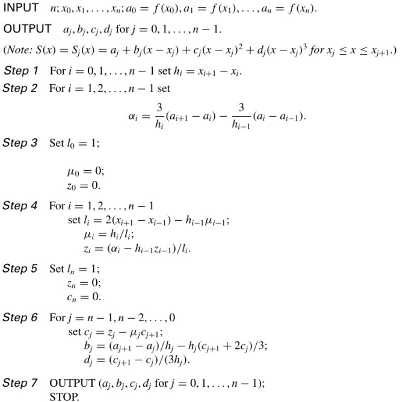

Let us now create this in Python.

First we must define a dataset to work with. I will use what was given in the Example in **Lecture 15**, where we have points:

$$ \left( 1, 2 \right) $$
$$ \left( 2, 3 \right) $$
$$ \left( 3, 5 \right) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3])
Y = np.array([2, 3, 5])

Now let us define the algorithm, we only need to pass in the arrays $X$ and $Y$.

Note that there are comments intended to help understanding, and be sure to refer to the pseudocode if stuck!

In [9]:
def CubicSplineCondition1(X, Y):
    '''
    Usage:
        Takes a set of known datapoints and uses Cubic Spline Interpolation between them
    Inputs:
        X: array of known x-values
        Y: array of known y-values
    Outputs:
        a: array of coefficients
        b: array of coefficients
        c: array of coefficients
        d: array of coefficients
    '''
    # Copy Inputs for usage
    x = np.copy(X)
    y = np.copy(Y)
    # Get size n
    n = len(x)
    
    # Helper h
    h = np.zeros([n])
    # Coefficients: a, b, c, d
    a = y
    b = np.zeros([n])
    c = np.zeros([n])
    d = np.zeros([n])
    
    # Matrix l
    l = np.zeros([n])
    # Matrix mu
    mu = np.zeros([n])
    # Helper z
    z = np.zeros([n])
    # b in Ax=b, now called alpha
    alpha = np.zeros([n])
    
    # Step 1
    for i in range(0, n - 1): # must be careful of the n - 1
        h[i] = x[i + 1] - x[i]
        
    # Step 2
    for i in range(1, n - 1):
        alpha[i] = 3 * (a[i + 1] - a[i]) / h[i] - 3 * (a[i] - a[i-1]) / h[i-1] #subbing in
        
    # Step 3
    l[0] = 1
    mu[0] = 0
    z[0] = 0
    
    # Step 4
    for i in range(1, n - 1):
        l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * mu[i - 1] # remember we have said l is the diagonal in L
        mu[i] = h[i] / l[i] # remember we have said mu is the second diagonal in U
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]
        
    # Step 5
    l[n - 1] = 1
    z[n - 1] = 0
    c[n - 1] = 0
    
    # Step 6
    for j in range(n - 2, -1, -1): # from n - 2 to 0, check notation for n
        c[j] = z[j] - mu[j] * c[j + 1] # subbing in formulae
        b[j] = (a[j + 1] - a[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])
        
    # Extra - Print results
    for i in range(n - 1):
        print("S" + str(i) + "(x) = " + str(a[i]) + " + " + \
              str(b[i]) + "(x-" + str(x[i]) + ") + " + \
              str(c[i]) + "(x-" + str(x[i]) + ")^2 + " + \
              str(d[i]) + "(x-" + str(x[i]) + ")^3")
        
    # Step 7
    return (a, b, c, d)

We can now test this algorithm for a solution, which will be returned as a tuple $(a, b, c, d)$:

In [10]:
CubicSplineCondition1(X, Y)

S0(x) = 2 + 0.75(x-1) + 0.0(x-1)^2 + 0.25(x-1)^3
S1(x) = 3 + 1.5(x-2) + 0.75(x-2)^2 + -0.25(x-2)^3


(array([2, 3, 5]),
 array([0.75, 1.5 , 0.  ]),
 array([0.  , 0.75, 0.  ]),
 array([ 0.25, -0.25,  0.  ]))

Let us plot these:

S0(x) = 2 + 0.75(x-1) + 0.0(x-1)^2 + 0.25(x-1)^3
S1(x) = 3 + 1.5(x-2) + 0.75(x-2)^2 + -0.25(x-2)^3


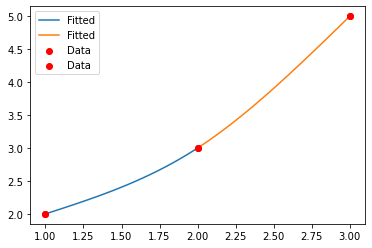

In [4]:
(a, b, c, d) = CubicSplineCondition1(X, Y)

for i in range(len(X) - 1): # Plotting all S on same plot
    Xs = np.linspace(X[i], X[i + 1], 50) # arbitray amount of points
    Ys = a[i] + b[i] * (Xs - X[i]) + c[i] * (Xs - X[i])**2 + d[i] * (Xs - X[i])**3 # create all S
    plt.plot(Xs, Ys, label = "Fitted", zorder = -1)
    plt.scatter(X, Y, label = "Data", color = "red")
    plt.legend()

Let us test this in an example. We import the data regarding British Coal Consumption over the last 100 years. We would like to use Cubic Spline Interpolation to better see how this Consumption changed over time.

First, we must import the data and pass it through the created Function:

In [5]:
data = np.genfromtxt("assets//british_coal.csv", delimiter = ",", skip_header = 3)
x = data[:, 0]
y = data[:, 1]

(a, b, c, d) = CubicSplineCondition1(x, y)

S0(x) = 292.02888 + -23.38155721658861(x-1913.0) + 0.0(x-1913.0)^2 + 1.2673012165886004(x-1913.0)^3
S1(x) = 269.914624 + -19.57965356682281(x-1914.0) + 3.801903649765801(x-1914.0)^2 + 3.120421917057003(x-1914.0)^3
S2(x) = 257.257296 + -2.614580516120199(x-1915.0) + 13.16316940093681(x-1915.0)^2 + -7.328884884816632(x-1915.0)^3
S3(x) = 260.477 + 1.725103631303524(x-1916.0) + -8.823485253513086(x-1916.0)^2 + -0.9036343777904078(x-1916.0)^3
S4(x) = 252.474984 + -18.63277000909387(x-1917.0) + -11.53438838688431(x-1917.0)^2 + 9.085158395978189(x-1917.0)^3
S5(x) = 231.392984 + -14.446071594927925(x-1918.0) + 15.721086801050255(x-1918.0)^2 + 0.7884807938776568(x-1918.0)^3
S6(x) = 233.45648 + 19.36154438880555(x-1919.0) + 18.086529182683226(x-1919.0)^2 + -37.70004157148878(x-1919.0)^3
S7(x) = 233.204512 + -57.56552196029435(x-1920.0) + -95.01359553178312(x-1920.0)^2 + 85.23762149207747(x-1920.0)^3
S8(x) = 165.863016 + 8.120151452371843(x-1921.0) + 160.69926894444927(x-1921.0)^2 + -81.081724396

Now we can plot this in a similar fashion:

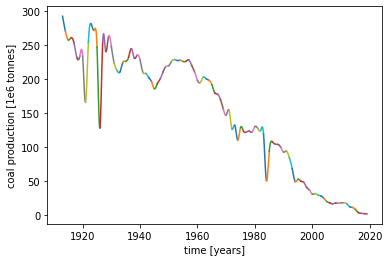

In [6]:
for i in range(len(x) - 1):
    xs = np.linspace(x[i], x[i + 1], 50)
    ys = a[i] + b[i] * (xs - x[i]) + c[i] * (xs - x[i])**2 + d[i] * (xs - x[i])**3
    plt.plot(xs, ys)
    plt.xlabel("time [years]")
    plt.ylabel("coal production [1e6 tonnes]")